In [1]:
#import Library
import pandas as pd
import numpy as np
from nltk.tokenize import  word_tokenize
import nltk 
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords 
import re
import math 
# !pip install pyvi
import nltk
nltk.download('wordnet')
from pyvi import ViTokenizer
from string import punctuation

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.5 MB 5.1 MB/s 
     |████████████████████████████████| 965 kB 55.7 MB/s 


[nltk_data] Downloading package wordnet to /root/nltk_data...


In [2]:
#input data from txt
import glob, os
os.chdir("/content/drive/MyDrive/data/2016-03/2016-03-02")
names = []
news = []
for file in glob.glob("*.txt"):
    names.append(file)
print("len news :",len(names),names)
for i in range(20) :
  f = open(f"/content/drive/MyDrive/data/2016-03/2016-03-02/{names[i]}", "r")
  news = news + f.readlines()
print(len(news))

len news : 72 ['thesaigontimes.vn.txt', 'xaluan.com.txt', 'bongdaso.com.txt', 'vietnamplus.vn.txt', 'thanhnien.com.vn.txt', 'cadn.com.vn.txt', 'genk.vn.txt', 'congly.com.vn.txt', 'phunutoday.vn.txt', 'antt.vn.txt', 'tintuconline.com.vn.txt', 'tuoitre.vn.txt', 'vneconomy.vn.txt', 'vtv.vn.txt', 'ictnews.vn.txt', 'cafebiz.vn.txt', 'petrotimes.vn.txt', 'bongda365.com.vn.txt', 'vntinnhanh.vn.txt', 'ndh.vn.txt', 'kienthuc.net.vn.txt', 'cafef.vn.txt', 'giadinh.net.vn.txt', 'nongnghiep.vn.txt', 'ktdt.vn.txt', 'baotintuc.vn.txt', 'baochinhphu.vn.txt', 'khampha.vn.txt', 'eva.vn.txt', 'autopro.com.vn.txt', 'motthegioi.vn.txt', 'vnexpress.net.txt', 'tamnhin.net.txt', 'vov.vn.txt', 'anninhthudo.vn.txt', 'doisongphapluat.com.txt', 'infonet.vn.txt', 'afamily.vn.txt', 'congluan.vn.txt', 'baodatviet.vn.txt', 'nhipcaudautu.vn.txt', 'vtc.vn.txt', 'nguoiduatin.vn.txt', 'qdnd.vn.txt', 'news.zing.vn.txt', 'baodautu.vn.txt', 'cand.com.vn.txt', 'ngoisao.net.txt', 'dantri.com.vn.txt', 'bongdaplus.vn.txt', 'nha

In [4]:
# convert txt to pandas
def str_to_pd(news_txt):
  arr = []
  for i in range(len(news)):
    x = news[i].split("$",1)
    arr.append(x)
  title = []
  link = []
  pre_message = []
  message = []
  for i in range(len(arr)):
    link.append(arr[i][0])
    pre_message.append(arr[i][1])
  for i in range(len(arr)):
    x = pre_message[i].split(".",1)[0]
    y = pre_message[i].split(".",1)[1]
    title.append(x)
    message.append(y)
  dict = {'link': link,"title":title,'message': message} 
  df = pd.DataFrame(dict)
  return df

In [5]:
# remove stopwords and clean Word
df = str_to_pd(news)
# stop_words = set(open("/content/drive/MyDrive/data/vietnamese-stopwords.txt").read().split('\n')[:-1])
df['message'] = df['message'].str.replace(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '')
def cleanWord(s):
  miss = ['!','@','#','$','%','^','&','*','(',')','-','+','=','{','[','}',']','|',':',';','?','/','<','>','~','`','.',',','"']
  for i in miss:
    s = s.replace(i,' ')
  return s
message = []
for i in df.message:
  doc = (str(i).lower())
  doc = cleanWord(doc)
  # Xóa khoảng cách thừa 
  doc = re.sub(r'\s+', ' ', doc).strip()
  message.append(doc)
title_ = df['title'].copy()
data = pd.DataFrame({'message':message, 'title': title_})
data.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


,message,title
0,tbktsg online các nhà cung cấp dịch vụ interne...,"Từ 3-3, kết nối internet ra quốc tế sẽ bị chậm"
1,tbktsg online ngày 1 3 tổng công ty cơ khí gia...,TPHCM có tuyến xe buýt sạch đầu tiên
2,tbktsg “khi thị trường tài chính tiền tệ thực ...,Nâng cao vị thế VND
3,tbktsg online trên tbktsg số 2 2016 ra ngày 7 ...,Một khái niệm chưa thật khoa học cả nội dung ...
4,tbktsg online trên tbktsg số 2 2016 ra ngày 7 ...,Một khái niệm chưa thật khoa học cả nội dung ...


In [6]:
data_test = data.copy()

In [7]:
#preprocessing data
def preprocessing(data):
  data['message'] = data['message'].str.lower()
  messages = []
  for i in data['message']:
      messages.append(ViTokenizer.tokenize(i))
  #convert messages to dataframe
  messages = pd.DataFrame(messages, columns = ['messages'])
  #concat labels to dataframe
  messages = pd.concat([data['title'], messages], axis = 1)
  return messages
data = preprocessing(data)

In [8]:
#Define Corpus's Documents
corpus = []
for i in range(len(data["messages"])):
  corpus.append(data["messages"][i])

In [9]:
# total_documents
total_documents = len(corpus)
total_documents

2281

In [10]:
# count word in 1 document
def word_count(document):
  dic = {}
  document = document.split(" ")
  for new in document:
    if new in dic:
      dic[new] = dic[new] + 1
    else:
      dic[new] = 1
  return dic

In [11]:
#create a word_set
def word_set(corpus):
  word_set = []
  for document in corpus:
    for word in document.split(" "):
      if word in word_set:
        continue
      else:
        word_set.append(word)  
  return word_set

In [12]:
dictionary = word_set(corpus)

In [14]:
# compute TF
def termfreq(document):
  dic = word_count(document)
  for word,fred in dic.items():
    dic[word] = fred/len(dic)
  return dic

In [15]:
dic = []
for i in range(total_documents):
  dic.append(termfreq(corpus[i]))

In [16]:
id = {}
for i in range(len(dictionary)):
  id[dictionary[i]] = i

In [17]:
df.head()

,link,title,message
0,http://www.thesaigontimes.vn/142983/Tu-3-3-ket...,"Từ 3-3, kết nối internet ra quốc tế sẽ bị chậm",(TBKTSG Online) - Các nhà cung cấp dịch vụ In...
1,http://www.thesaigontimes.vn/142986/TPHCM-co-t...,TPHCM có tuyến xe buýt sạch đầu tiên,"(TBKTSG Online) - Ngày 1-3, Tổng công ty Cơ k..."
2,http://www.thesaigontimes.vn/142720/Nang-cao-v...,Nâng cao vị thế VND,(TBKTSG) - “Khi thị trường tài chính tiền tệ ...
3,http://www.thesaigontimes.vn/142948/Mot-khai-n...,Một khái niệm chưa thật khoa học cả nội dung ...,(TBKTSG Online) - Trên TBKTSG số 2-2016 ra ng...
4,http://www.thesaigontimes.vn/142948/KTTT-dinh-...,Một khái niệm chưa thật khoa học cả nội dung ...,(TBKTSG Online) - Trên TBKTSG số 2-2016 ra ng...


In [18]:
df_id = pd.DataFrame.from_dict(id,orient='index',columns = ["id"])
df_id = df_id.rename_axis('word').reset_index()

In [19]:
df_id.head()

,word,id
0,tbktsg,0
1,online,1
2,các,2
3,nhà,3
4,cung_cấp,4


In [20]:
# compute IDF score
def idf_score(word,total_documentsm,corpus):
  doc_count = 0
  for i in range(total_documents):
    if word in corpus[i]:
      doc_count = doc_count + 1
  return np.log(total_documents/(1+doc_count))

In [21]:
score_idf = []
for word in df_id["word"]:
  score = idf_score(word,len(corpus),corpus)
  score_idf.append(score)

In [22]:
df_id['idf_score'] = score_idf


In [23]:
#save score to csv
# df_id.to_csv("/content/drive/MyDrive/data/IDF.csv")
# s = idf_score(df_id["word"][22188],len(corpus),corpus)
# dt = pd.read_csv(r'/content/drive/MyDrive/data/IDF.csv')   
# df_id = pd.DataFrame(dt, columns= ['word','id',"idf_score"])
df_id

In [26]:
data = []
for i in range(total_documents):
  df = pd.DataFrame.from_dict(dic[i],orient='index',columns = ["tf"])
  df = df.rename_axis('word').reset_index()
  df_new = pd.merge(df, df_id, on='word', how="left")
  data.append(df_new)

In [27]:
#compute TF_IDF
for i in range(total_documents):
  tfidf_columns = data[i]["tf"] * data[i]["idf_score"]
  data[i]["tfidf_score"] = tfidf_columns

In [29]:
# for i in range(len(data)):
#   data[i].to_csv(f"/content/drive/MyDrive/data/TFIDF/tfidf{i}.csv")

In [30]:
id_pd = df_id[["id","word"]]

In [31]:
id_pd

,id,word
0,0,tbktsg
1,1,online
2,2,các
3,3,nhà
4,4,cung_cấp
...,...,...
26235,26235,thái_ủy_viên
26236,26236,liên_tiếp_theo
26237,26237,hội_sở
26238,26238,tổng_lợi_nhuận


In [32]:
tf_idf_matrix = []
for j in range(len(data)):
  tf_idf_vec = np.zeros((len(id_pd),))
  try:
    for i in range(len(data[j]["id"])):
      tf_idf_vec[data[j]["id"][i]] = data[j]["tf"][i] * data[j]["idf_score"][i]
  except:
    tf_idf_vec = np.zeros((len(id_pd),))
  tf_idf_matrix.append(tf_idf_vec)

In [33]:
tf_idf_matrix[0]

array([0.06292954, 0.03769071, 0.00897954, ..., 0.        , 0.        ,
       0.        ])

In [34]:
def norm_vec(vector):
  norm2 = math.sqrt(sum([val ** 2 for val in vector]))
  return norm2

In [35]:
def normalize(A):
  lengths = (A**2).sum(keepdims=True)**.5
  return A/lengths

In [36]:
norm_2vec = np.array([normalize(doc_vec) for doc_vec in tf_idf_matrix])

In [37]:
import heapq
import datetime
from numba import jit, njit
import numba

In [38]:
@jit(nopython=True)
def cosine_distance(data_point_one,data_point_two):
  res = 1 - data_point_one.dot(data_point_two)
  return res

In [39]:
# X = np.tril(X,-1)
# X[X == 0] = 1
# def smallest_distance(res):
#   i, j = np.unravel_index(np.nanargmin(res), res.shape)
#   dis = res[i,j]
#   return dis,[dis,[[i],[j]]],i,j

In [40]:
import time
start = time.time()
result = []
rows_in_slice = 100
slice_start = 0
slice_end = slice_start + rows_in_slice
while slice_end <= norm_2vec.shape[0]:
    result.append(1 - norm_2vec[slice_start:slice_end].dot(norm_2vec.T))
    slice_start += rows_in_slice
    slice_end = slice_start + rows_in_slice
results = np.concatenate(result)
print("Time taken: %s seconds" % (time.time() - start))

Time taken: 10.491779327392578 seconds


In [41]:
distance_list = []
dataset_size = results.shape[0]
# dataset_size = len(norm_2vec)
for i in range(dataset_size-1):    
  for j in range(i+1, dataset_size):    
    # dist = cosine_distance(norm_2vec[i], norm_2vec[j])
    distance_list.append((results[i][j], [results[i][j], [[i], [j]]]))

In [42]:
heapq.heapify(distance_list)

In [43]:
# ##start
heap = distance_list.copy()

In [44]:
#initilize current_cluseters
current_clusters = {}
for i in range(norm_2vec.shape[0]):
  current_clusters[str([i])] = {}
i = 0
for k,v in current_clusters.items():
  current_clusters[k]["centroid"] = norm_2vec[i]
  current_clusters[k]["elements"] = [i]
  i += 1

In [45]:
# def check if include old cluster
def valid_heap_node(heap_node, old_clusters):
  pair_dist = heap_node[0]
  pair_data = heap_node[1]
  for old_cluster in old_clusters:
      if old_cluster in pair_data:
          return False
  return True

In [46]:
# sqrt( ((n1x1)**2 + (n2x2)**2) / (n1**2 + n2**2) )

In [47]:
# # recompute 2 cluster
# def compute_centroid(data_vec, data_points_index):
#   dimension = len(data_vec[0])
#   size = len(data_points_index)
#   centroid = [0.0]*dimension
#   for idx in data_points_index:
#     dim_data = data_vec[idx]
#     for i in range(dimension):
#         centroid[i] += float(dim_data[i])
#   for i in range(dimension):
#       centroid[i] /= size
#   centroid = np.array(centroid)
#   return centroid

In [48]:
# recompute 2 cluster
def compute_centroid(data_vec,current_clusters,data_point_one,data_point_second):
  x1 = current_clusters[str(data_point_one)]["centroid"]
  x2 = current_clusters[str(data_point_second)]["centroid"]
  centroid = np.sqrt( ((len(data_point_one)*x1)**2 + (len(data_point_second)*x2)**2) / (len(data_point_one)**2 + len(data_point_second)**2) )
  return centroid

In [49]:
def valid_heap_node(heap_node, old_clusters):
  pair_dist = heap_node[0]
  pair_data = heap_node[1]
  for old_cluster in old_clusters:
      if old_cluster in pair_data:
          return False
  return True

In [50]:
old_clusters = []
dis, min_item = heapq.heappop(heap)
while(dis < 0.6):
  dis, min_item = heapq.heappop(heap)
  pair_data = min_item[1]
  if not valid_heap_node(min_item, old_clusters):
    continue
  new_cluster = {}
  new_cluster_elements = sum(pair_data,[])
  # print(pair_data[0] , pair_data[1])
  new_cluster_cendroid = compute_centroid(norm_2vec,current_clusters,pair_data[0],pair_data[1])
  # new_cluster_cendroid = compute_centroid(norm_2vec,new_cluster_elements)
  new_cluster_elements.sort()
  new_cluster.setdefault("centroid", new_cluster_cendroid)
  new_cluster.setdefault("elements", new_cluster_elements)
  # delete cluster old
  for pair_item in pair_data:
    old_clusters.append(pair_item)
    del current_clusters[str(pair_item)]
  # recompute distance among new cluster
  for ex_cluster in current_clusters.values():
    new_heap_entry = []
    dist = cosine_distance(ex_cluster["centroid"], new_cluster["centroid"])
    new_heap_entry.append(dist)
    new_heap_entry.append([new_cluster["elements"], ex_cluster["elements"]])
    heapq.heappush(heap, (dist, new_heap_entry))
  current_clusters[str(new_cluster_elements)] = new_cluster
  # print(current_clusters[str(new_cluster_elements)])

In [51]:
# dis, min_item = heapq.heappop(heap)

In [52]:
pair_data = min_item[1]

In [53]:
pair_data

[[748], [1942]]

In [54]:
for ex_cluster in current_clusters.values():
  if len(ex_cluster["elements"]) > 15 :
    print(ex_cluster["elements"])

[761, 762, 767, 773, 774, 775, 792, 799, 800, 801, 802, 803, 804, 805, 810, 811, 812]
[27, 40, 67, 93, 98, 100, 203, 300, 425, 763, 771, 847, 863, 1033, 1279, 1536, 1703, 1704, 1724, 1772, 1802, 2043, 2044, 2045, 2049, 2050, 2051, 2052, 2053, 2074, 2079, 2109, 2124, 2135, 2148]
[165, 272, 506, 1005, 1274, 1275, 1386, 1402, 1426, 1482, 1483, 1490, 1491, 1511, 1513, 1668, 1744, 1799, 2005, 2182]
[5, 6, 7, 53, 107, 207, 234, 413, 492, 530, 744, 838, 842, 858, 910, 916, 962, 977, 1052, 1062, 1211, 1359, 1460, 1547, 1556, 1569, 1575, 1637, 1680, 1692, 1695, 1713, 1743, 1789, 1808, 1820, 1821, 1848, 1919, 1934, 1961, 2159, 2160, 2187]
[92, 101, 236, 249, 311, 491, 566, 638, 845, 934, 1044, 1125, 1126, 1238, 1336, 1463, 1590, 1687, 1777, 1833, 1901, 2146, 2199]
[15, 145, 196, 310, 376, 522, 889, 941, 1468, 1480, 1652, 1684, 1688, 1699, 2237, 2243, 2250, 2257, 2258, 2259, 2270]
[56, 140, 293, 390, 393, 417, 433, 454, 578, 583, 601, 604, 666, 667, 747, 1425, 1492, 1494, 1522, 1526]
[91, 183, 23

In [55]:
data_test["title"][207]

' Tỉ phú Trump bỏ xa đối thủ trong ngày Siêu thứ Ba '

In [56]:
data_test["title"][842]

' Ông Donald Trump bỏ xa đối thủ trong cuộc bầu cử sơ bộ tại Georgia '

In [57]:
x = []
for ex_cluster in current_clusters.values():
  if len(ex_cluster["elements"]) > 15 :
    x.append(ex_cluster["centroid"])

In [58]:
# !pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import random
from collections import defaultdict
import re

{'03': 0.29847113576311274, '28': 0.2720900504299171, '27': 0.24964500139604381, 'city': 0.24261495090300686, 'west': 0.2172852342681592, '02': 0.2055619198766991, '45': 0.17435297230092872, '17': 0.16659692093048006, '18': 0.16109860654736594, 'watford': 0.15774275599840656, 'tottenham': 0.15529965364182802, '36': 0.15055496881737718, '16': 0.1481624193990464, 'utd': 0.14785091178030396, '4': 0.14455555296570466, '31': 0.1395738845214124, '26': 0.12428464480317437, 'liverpool': 0.11990457493685812, '11': 0.11423854608573296, '5': 0.1134679477742253}


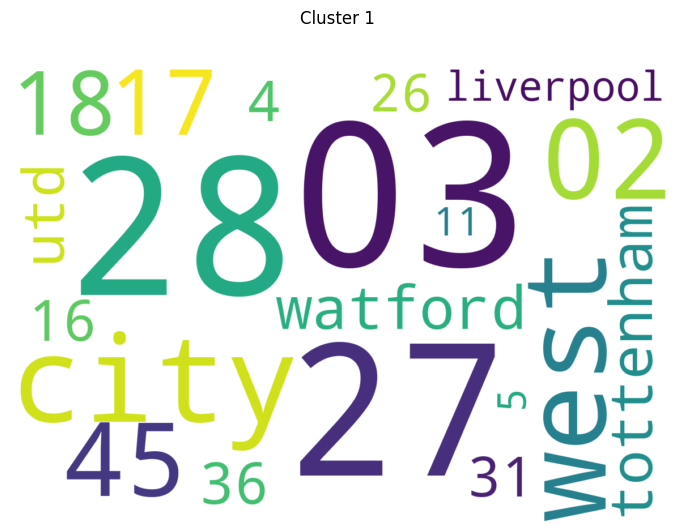

{'chelsea': 0.29924084937411655, 'leicester': 0.22795718423664615, 'norwich': 0.22056273669240922, 'city': 0.1750577883897033, 'kenedy': 0.17309709334792175, 'brom': 0.1582164039227899, 'west': 0.155537076572964, 'hiddink': 0.1353763367762649, 'costa': 0.1302857746165182, 'tỉ_số': 0.12069445231660209, "'": 0.11081496028390725, 'premier': 0.1082349267382855, 'league': 0.10814783867080871, 'ghi_bàn': 0.10233344940362712, 'ranieri': 0.10143019439736997, 'blues': 0.09928641782212713, 'king': 0.09180530589504687, 'thắng': 0.0871069496117792, 'trận_đấu': 0.08589569513204061, 'bàn': 0.08490813806343565}


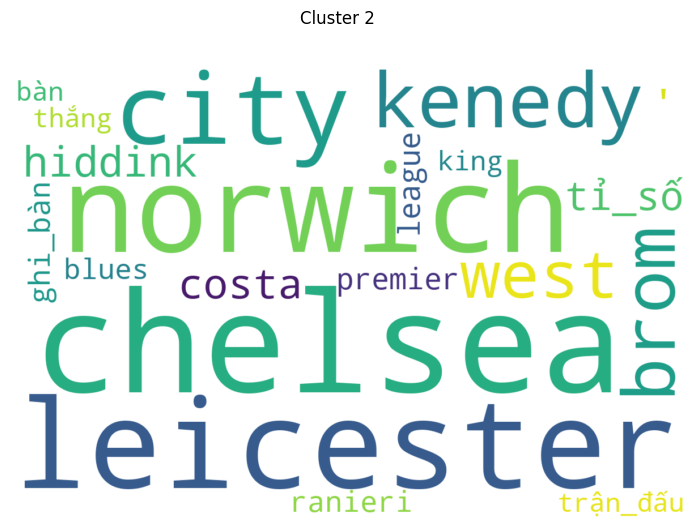

{'tai_nạn': 0.2802380239261141, 'quang_vinh': 0.23744072931017132, 'camry': 0.2157568285966579, 'quận': 0.20959253373181747, 'long': 0.19604207502409685, 'biên': 0.18296413556954388, 'điều_tra': 0.18084502686709886, 'điều_khiển': 0.17746841960763754, 'xe': 0.17203214475104447, 'công_an': 0.17159840241186303, 'vinh': 0.16667284478173083, 'lái': 0.13701878462514064, 'thượng_tá': 0.13661786999679812, 'nguyễn': 0.13213683354477, 'cơ_quan': 0.12793358634282676, 'chiếc': 0.11911484498824311, 'lái_xe': 0.11330813707512223, 'sơn': 0.11131851346278393, 'gây': 0.1054639833112008, 'vân': 0.09920154213350821}


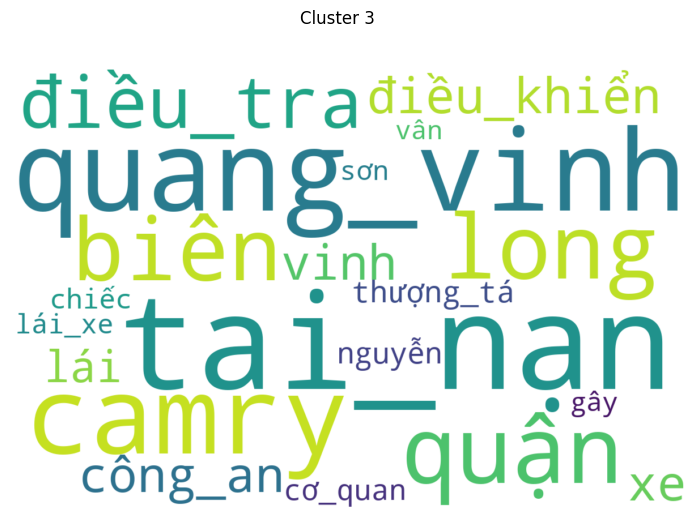

{'bang': 0.3387271658429906, 'bầu_cử': 0.26372943111371483, 'đảng': 0.25335753693135804, 'clinton': 0.24196082099323904, 'trump': 0.2142698554480824, 'đại_biểu': 0.17879976131790118, 'sơ_bộ': 0.1769166953302124, 'phiếu': 0.15945498769164515, 'ứng_cử_viên': 0.1516189970432108, 'hillary': 0.15160983800570352, 'dân_chủ': 0.13722792850980967, 'chiến_thắng': 0.136324421655982, 'giành': 0.1345279654316037, 'siêu': 0.13099669449425475, 'cộng_hòa': 0.12400737594435393, 'georgia': 0.1187921516905411, 'texas': 0.11077363668647332, 'áp_đảo': 0.10575443357509556, 'virginia': 0.10120389865781423, 'nghị_sĩ': 0.09856084659679262}


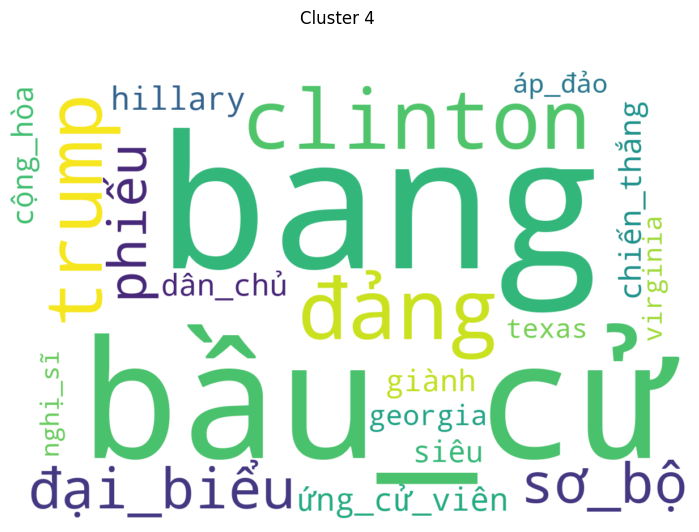

{'tỷ_phú': 0.3934493794838527, 'danh_sách': 0.30590008732048685, 'usd': 0.24897761154360032, 'ròng': 0.24083798250772115, 'trị_giá': 0.2387133160393028, 'tài_sản': 0.22537794664041824, 'forbes': 0.19656270152122723, 'tỉ_phú': 0.18547387783943337, 'gates': 0.16374832582747967, 'bill': 0.14821081971716885, 'sáng_lập': 0.14305137063377119, 'tỷ': 0.13868744874015343, 'tạp_chí': 0.12106205417921899, 'vượng': 0.11783441616082585, 'thế_giới': 0.10990288382074126, 'giàu': 0.10682438075939356, 'xếp_hạng': 0.09155239124843928, 'đứng': 0.08779775377210775, 'vingroup': 0.0790077815068862, 'tỉ': 0.07852573979208098}


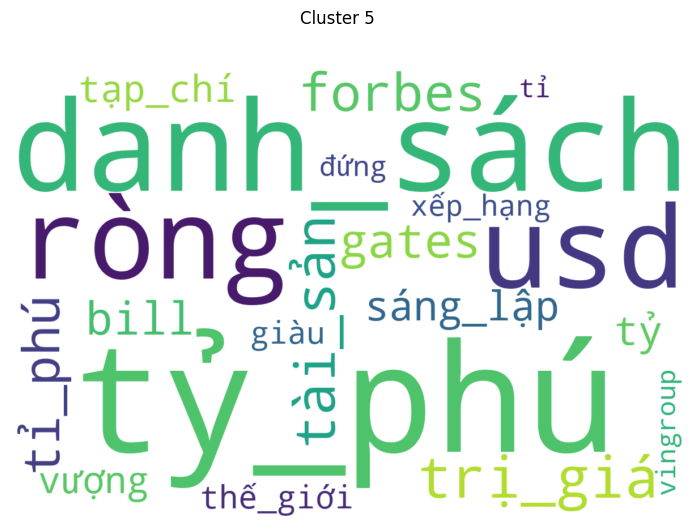

{'cổ_phiếu': 0.26760866658214266, 'tăng': 0.2652184263538128, 'khớp': 0.2241790793858829, 'mã': 0.21944217677941236, 'index': 0.19893426931114555, 'chỉ_số': 0.18887616720683859, 'đơn_vị': 0.17778152260052554, 'giao_dịch': 0.17473600606853232, 'phiên': 0.15934424928460514, 'chứng_khoán': 0.13611898168942063, 'đồng_cp': 0.13109391755336786, 'bvh': 0.1258012656769272, 'bgm': 0.11898100075419149, 'điểm': 0.11396331708501257, 'nhóm': 0.11269010464847358, 'thị_trường': 0.11259144775376699, 'triệu': 0.10830221068066448, 'cp': 0.10699768478661281, 'vcb': 0.09085706973357803, 'mức': 0.08820036741176876}


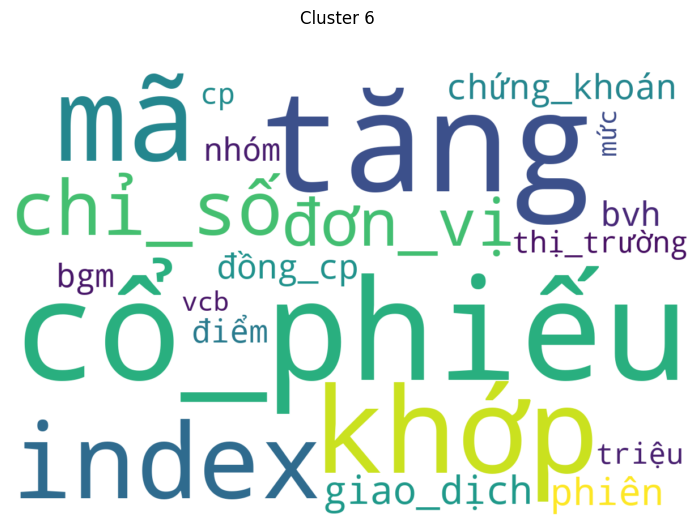

{'tôi': 0.601280203889382, 'chồng': 0.413672378363207, 'cậu': 0.14170574851567672, 'tắm': 0.10345223657949669, 'mẹ': 0.1007886626683491, 'xong': 0.10009978858268745, 'hôm': 0.09726629513540312, 'bố_mẹ': 0.08751276889150207, 'tầng': 0.08040746704963328, 'nhìn': 0.07591774918041241, 'đấy': 0.06939910159505566, 'phòng': 0.06758519902459624, 'em_trai': 0.06721702579734709, 'nói': 0.06699951587983563, 'cưới': 0.060276322502965454, 'con_giáp': 0.05897119564821503, 'gan': 0.058594388343238546, 'kế_toán': 0.058130091662785655, 'rồi': 0.05661099190743084, 'tình_nhân': 0.05641728632203911}


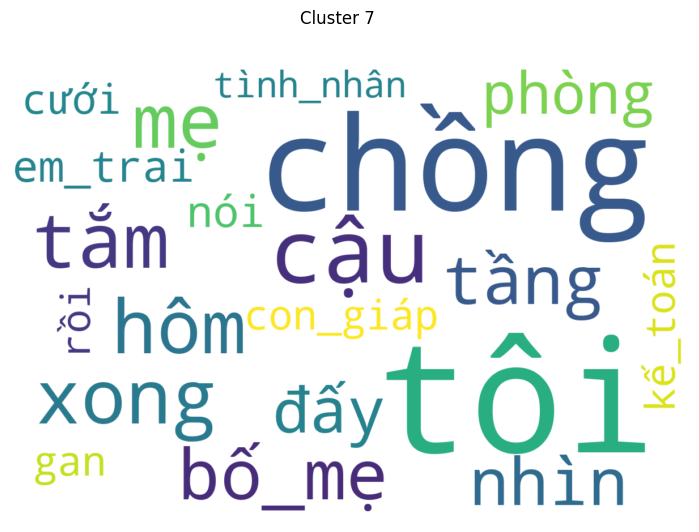

{'vàng': 0.39646141394573914, 'usd': 0.2789925688014368, 'sjc': 0.23826155142590444, 'ounce': 0.22974120578739862, '33': 0.21798045642859376, 'giảm': 0.1463991992444772, 'mức': 0.136102749208813, 'tỷ_giá': 0.1242476147257826, 'giao_dịch': 0.12120116480577052, '22': 0.11251649275465675, 'lượng': 0.11116585606449286, 'phiên': 0.10865223637727524, 'đồng': 0.10176854783797605, 'vnđ': 0.10119288654746893, 'giá': 0.0985322405538181, 'thị_trường': 0.09543622860176766, 'miếng': 0.092499028006714, 'vàng_bạc': 0.09247706362783122, '000': 0.09165902085747747, 'niêm_yết': 0.09165213073505445}


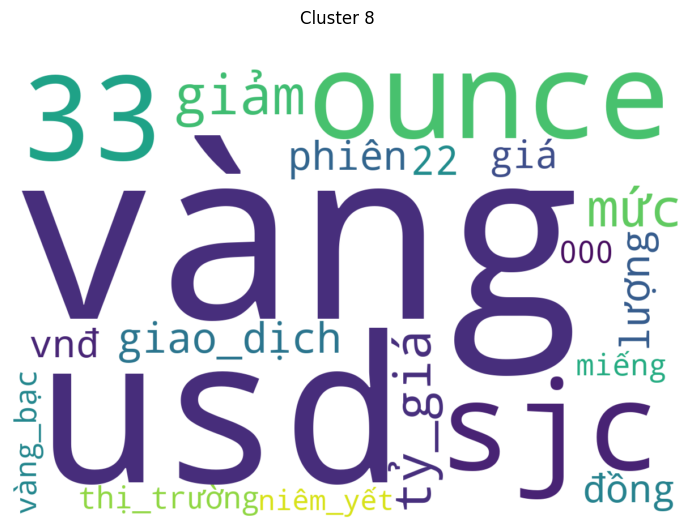

{'dầu': 0.35040318645183677, 'sản_lượng': 0.3373406403450893, 'thùng': 0.28451247770855503, 'đóng_băng': 0.2115102393533673, 'dầu_mỏ': 0.19993187829708695, 'opec': 0.16977337666147785, 'arabia': 0.15650299839859866, 'saudi': 0.15480501379878578, 'thỏa_thuận': 0.15252041382180528, 'dầu_thô': 0.14032452124241507, 'iran': 0.12441964913796473, 'usd': 0.11791879041255879, 'phiên': 0.10835660703300079, 'tăng_sản_lượng': 0.10325845633569156, 'năng_lượng': 0.09711832818233984, 'mỹ': 0.09493441711071474, 'cắt_giảm': 0.09074976287074177, 'giảm': 0.09047201956156521, 'mức': 0.0867835913892408, 'wti': 0.0854362818535112}


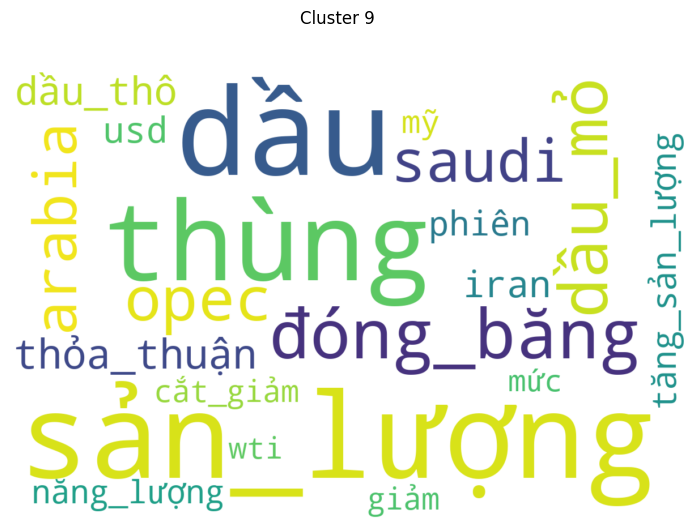

{'real': 0.2872312599827584, 'zidane': 0.283263841870537, 'atletico': 0.2296964832365124, 'madrid': 0.2224639674306137, 'ronaldo': 0.20921610788015177, 'perez': 0.1641087716226767, 'cđv': 0.15598505292871925, 'allegri': 0.15515141142164843, 'ramos': 0.13664644475749094, 'sociedad': 0.134339404007028, 'levante': 0.13183983421948633, 'florentino': 0.12109562193325664, 'bernabeu': 0.10896118717011903, 'huấn_luyện_viên': 0.09567498756070686, 'zinedine': 0.09296044805948726, 'juventus': 0.09244057251090665, 'benitez': 0.09221517808210476, 'massimiliano': 0.09000382005644318, 'cris': 0.0878606900718169, 'zizou': 0.087657735957924}


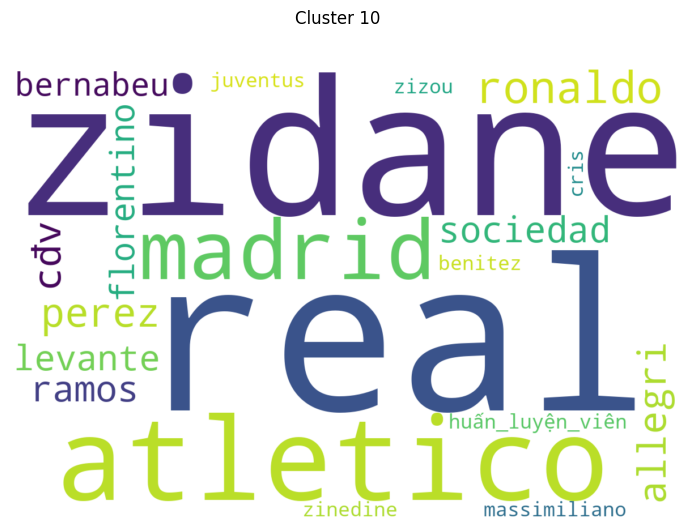

{'triều_tiên': 0.47243745683813576, 'trừng_phạt': 0.30326167194971615, 'liên_hợp': 0.2005767743739584, 'bỏ_phiếu': 0.1987976607317809, 'nghị_quyết': 0.17607934827246027, 'hạt_nhân': 0.16077950297274946, 'dự_thảo': 0.15793920292180183, 'lhq': 0.1551907841122626, 'geun': 0.1212028588135321, 'áp_đặt': 0.1189934028973145, 'tên_lửa': 0.11877736133231497, 'biện_pháp': 0.11609188134643807, 'nhưỡng': 0.11576685647423673, 'hoãn': 0.11383471280810652, 'hye': 0.1137319647269337, 'hội_đồng': 0.10534857265951926, 'bảo_an': 0.10154865244709582, 'cấm': 0.10097328078824049, 'park': 0.09721697949687438, 'vũ_khí': 0.08706248045247457}


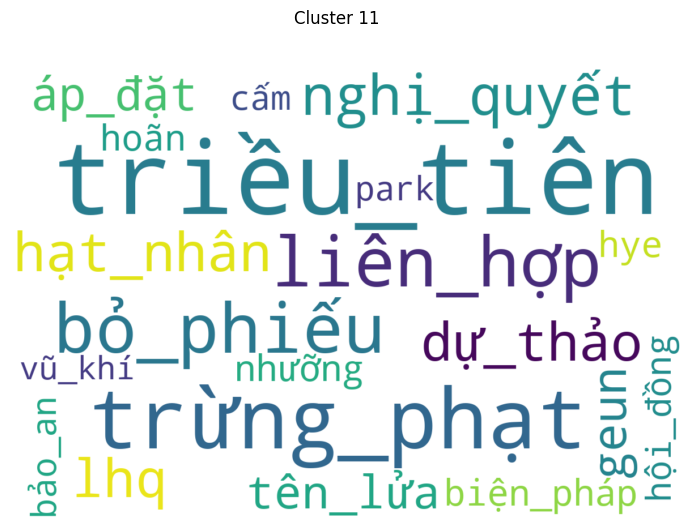

In [60]:
n = 20
i=0
for arr in x:
  indices = (-arr).argsort()[:n]
  i += 1
  term_weights = {id_pd["word"][in_idx]: arr[in_idx] for in_idx in indices}
  wc = WordCloud(width=1200, height=800, background_color="white")
  print(term_weights)
  wordcloud = wc.generate_from_frequencies(term_weights)
  fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
  ax.imshow(wordcloud, interpolation='bilinear')
  ax.axis("off")
  fig.suptitle(f"Cluster {i}")
  plt.show()

In [61]:
x[0]

array([0.       , 0.       , 0.0010613, ..., 0.       , 0.       ,
       0.       ])

In [62]:
x

[array([0.       , 0.       , 0.0010613, ..., 0.       , 0.       ,
        0.       ]),
 array([0.        , 0.        , 0.00351473, ..., 0.        , 0.        ,
        0.        ]),
 array([0.        , 0.00746932, 0.00356704, ..., 0.        , 0.        ,
        0.        ]),
 array([0.00603387, 0.01268112, 0.00916868, ..., 0.        , 0.        ,
        0.        ]),
 array([0.        , 0.01182355, 0.00414432, ..., 0.        , 0.        ,
        0.        ]),
 array([0.02707312, 0.01621504, 0.0064998 , ..., 0.        , 0.        ,
        0.        ]),
 array([0.        , 0.        , 0.00102992, ..., 0.        , 0.        ,
        0.        ]),
 array([0.        , 0.        , 0.00480356, ..., 0.        , 0.        ,
        0.        ]),
 array([0.        , 0.00873947, 0.00840495, ..., 0.        , 0.        ,
        0.        ]),
 array([0.        , 0.        , 0.00309305, ..., 0.        , 0.        ,
        0.        ]),
 array([0.        , 0.02554463, 0.00994505, ..., 0.     

In [63]:
np.dot(x[0],x[0])

# for i in range(len(x[0])):
#   sum = sum + x[0][i]**2

0.9999999999999998

In [64]:
sum 

<function sum(iterable, start=0, /)>